# Creating circular buffers around each weather station and calculating average height within each buffer

In [63]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
stns = gpd.read_parquet('fbg_stations.parquet')
bldgs = gpd.read_parquet('buildings_detailed.parquet')

In [65]:
stns.explore()

In [66]:
stns = stns.to_crs(bldgs.crs)

In [67]:
radii = [10,20,30,40,50,60,70,80,90,100,120,140,160,180,200,250,300,400,500,750,1000,1500,2000,5000,10000]

In [68]:
# create buffers around stations for each radius
for i in radii:
    stns['r'+str(i)] = stns['geometry'].buffer(i, cap_style = 1)

In [69]:
stns

,ID,Type,Elevation (m a.s.l),UAC,LCZ,Longitude (°E),Latitude (°N),geometry,r10,r20,...,r250,r300,r400,r500,r750,r1000,r1500,r2000,r5000,r10000
0,FRASHA,T1,296,11210,6,7.870209,47.986557,POINT (4191867.298 5324750.579),"POLYGON ((4191877.298 5324750.579, 4191877.25 ...","POLYGON ((4191887.298 5324750.579, 4191887.202...",...,"POLYGON ((4192117.298 5324750.579, 4192116.094...","POLYGON ((4192167.298 5324750.579, 4192165.853...","POLYGON ((4192267.298 5324750.579, 4192265.372...","POLYGON ((4192367.298 5324750.579, 4192364.89 ...","POLYGON ((4192617.298 5324750.579, 4192613.686...","POLYGON ((4192867.298 5324750.579, 4192862.483...","POLYGON ((4193367.298 5324750.579, 4193360.075...","POLYGON ((4193867.298 5324750.579, 4193857.667...","POLYGON ((4196867.298 5324750.579, 4196843.221...","POLYGON ((4201867.298 5324750.579, 4201819.145..."
1,FRBETZ,T2,250,11210,5,7.817673,48.004900,POINT (4188057.653 5327001.249),"POLYGON ((4188067.653 5327001.249, 4188067.605...","POLYGON ((4188077.653 5327001.249, 4188077.557...",...,"POLYGON ((4188307.653 5327001.249, 4188306.449...","POLYGON ((4188357.653 5327001.249, 4188356.209...","POLYGON ((4188457.653 5327001.249, 4188455.727...","POLYGON ((4188557.653 5327001.249, 4188555.246...","POLYGON ((4188807.653 5327001.249, 4188804.042...","POLYGON ((4189057.653 5327001.249, 4189052.838...","POLYGON ((4189557.653 5327001.249, 4189550.43 ...","POLYGON ((4190057.653 5327001.249, 4190048.023...","POLYGON ((4193057.653 5327001.249, 4193033.577...","POLYGON ((4198057.653 5327001.249, 4198009.501..."
2,FRBRUH,T1,238,12100,8,7.854189,48.031009,POINT (4190938.03 5329756.106),"POLYGON ((4190948.03 5329756.106, 4190947.982 ...","POLYGON ((4190958.03 5329756.106, 4190957.933 ...",...,"POLYGON ((4191188.03 5329756.106, 4191186.826 ...","POLYGON ((4191238.03 5329756.106, 4191236.585 ...","POLYGON ((4191338.03 5329756.106, 4191336.104 ...","POLYGON ((4191438.03 5329756.106, 4191435.622 ...","POLYGON ((4191688.03 5329756.106, 4191684.418 ...","POLYGON ((4191938.03 5329756.106, 4191933.214 ...","POLYGON ((4192438.03 5329756.106, 4192430.807 ...","POLYGON ((4192938.03 5329756.106, 4192928.399 ...","POLYGON ((4195938.03 5329756.106, 4195913.953 ...","POLYGON ((4200938.03 5329756.106, 4200889.877 ..."
3,FRDIET,T2,230,13300,C,7.792878,48.013766,POINT (4186261.904 5328087.592),"POLYGON ((4186271.904 5328087.592, 4186271.856...","POLYGON ((4186281.904 5328087.592, 4186281.808...",...,"POLYGON ((4186511.904 5328087.592, 4186510.7 5...","POLYGON ((4186561.904 5328087.592, 4186560.459...","POLYGON ((4186661.904 5328087.592, 4186659.978...","POLYGON ((4186761.904 5328087.592, 4186759.496...","POLYGON ((4187011.904 5328087.592, 4187008.293...","POLYGON ((4187261.904 5328087.592, 4187257.089...","POLYGON ((4187761.904 5328087.592, 4187754.681...","POLYGON ((4188261.904 5328087.592, 4188252.273...","POLYGON ((4191261.904 5328087.592, 4191237.828...","POLYGON ((4196261.904 5328087.592, 4196213.751..."
4,FRDREI,T1,260,12220,6,7.826545,47.995872,POINT (4188665.059 5325961.778),"POLYGON ((4188675.059 5325961.778, 4188675.011...","POLYGON ((4188685.059 5325961.778, 4188684.963...",...,"POLYGON ((4188915.059 5325961.778, 4188913.855...","POLYGON ((4188965.059 5325961.778, 4188963.615...","POLYGON ((4189065.059 5325961.778, 4189063.133...","POLYGON ((4189165.059 5325961.778, 4189162.652...","POLYGON ((4189415.059 5325961.778, 4189411.448...","POLYGON ((4189665.059 5325961.778, 4189660.244...","POLYGON ((4190165.059 5325961.778, 4190157.836...","POLYGON ((4190665.059 5325961.778, 4190655.429...","POLYGON ((4193665.059 5325961.778, 4193640.983...","POLYGON ((4198665.059 5325961.778, 4198616.907..."
5,FREBNE,T11,340,23000,C,7.922671,47.983431,POINT (4195763.842 5324194.382),"POLYGON ((4195773.842 5324194.382, 4195773.794...","POLYGON ((4195783.842 5324194.382, 4195783.746...",...,"POLYGON ((4196013.842 5324194.382, 4196012.639...","POLYGON ((4196063.842 5324194.382, 4196062.398...","POLYGON ((4196163.842 5324194.382, 4196161.916...","PO

In [70]:
stns['r200'].explore()

In [71]:
bldgs

,oid,aktualit,gebnutzbez,funktion,fktkurz,name_x,anzahlgs,lagebeztxt,geometry_x,geometry_y,...,Traufhoehe,roofType,measuredHeight,measuredHeight_uom,Gemeindeschluessel,Hausnummer,Lagebezeichnung,class,name_y,geometry
0,DEBWL0010007TAh1BL,2012-11-14,Gebaeude,"Gaststätte, Restaurant",31001_2081,None,NaN,Schauinslandstraße 359,"POLYGON ((4192240.744 5316764.543, 4192246.116...","MULTIPOLYGON Z (((416389.27 5307479.2 950.172,...",...,960.469,1000,10.297,m,8311000.0,359,Schauinslandstraße,Sonstige,None,"POLYGON ((4192240.744 5316764.543, 4192246.116..."
1,DEBWL0010007TAh6BL,2012-11-14,Gebaeude,Betriebsgebäude,31001_2112,Bergstation,NaN,Schauinslandstraße 390,"POLYGON ((4192993.803 5316111.04, 4192990.84 5...",MULTIPOLYGON Z (((417157.87 5306852.04 1209.48...,...,1222.039,1000,12.553,m,8311000.0,390,Schauinslandstraße,Sonstige,Bergstation,"POLYGON ((4192993.803 5316111.04, 4192990.84 5..."
2,DEBWL0010007TAh7BL,2012-11-14,Gebaeude,"Hotel, Motel, Pension",31001_2071,None,NaN,Schauinslandstraße 389,"POLYGON ((4193404.833 5316356.357, 4193406.45 ...",MULTIPOLYGON Z (((417562.7 5307121.43 1217.646...,...,1228.869,1000,11.223,m,8311000.0,389,Schauinslandstraße,Sonstige,None,"POLYGON ((4193404.833 5316356.357, 4193406.45 ..."
3,DEBWL0010007TA00BL,2012-11-14,Gebaeude,Wohnhaus,31001_1010,None,NaN,Schwaighofstraße 6,"POLYGON ((4190103.272 5324356.745, 4190103.325...",MULTIPOLYGON Z (((413956.642 5314962.283 275.2...,...,290.021,1000,14.752,m,8311000.0,6,Schwaighofstraße,Wohnen,None,"POLYGON ((4190103.272 5324356.745, 4190103.325..."
4,DEBWL0010007TA01BL,2019-12-06,Gebaeude,Umformer,31001_2523,None,NaN,Beethovenstraße 1 x,"POLYGON ((4189859.791 5324420.906, 4189860.299...",MULTIPOLYGON Z (((413711.51 5315020.19 274.964...,...,277.984,1000,3.020,m,8311000.0,1 x,Beethovenstraße,Sonstige,None,"POLYGON ((4189859.791 5324420.906, 4189860.299..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35869,DEBWL0010007TymGBL,2024-04-12,Gebaeude,Wohnhaus,31001_1010,None,NaN,Elsässer Straße 53,"POLYGON ((4188702.337 5328030.361, 4188702.596...",MULTIPOLYGON Z (((412411.86 5318561.44 244.015...,...,251.364,1000,7.349,m,8311000.0,53,Elsässer straße,Wohnen,None,"POLYGON ((4188702.337 5328030.361, 4188702.596..."
35870,DEBWL0010007TymIBL,2024-04-12,Gebaeude,Wohn- und Geschäftsgebäude,31001_1123,None,NaN,Elsässer Straße 51,"POLYGON ((4188703.516 5328012.535, 4188710.659...",MULTIPOLYGON Z (((412426.64 5318551.52 244.267...,...,250.469,1000,6.202,m,8311000.0,51,Elsässer straße,Wohnen,None,"POLYGON ((4188703.516 5328012.535, 4188710.659..."
35871,DEBWL0010007TykeBL,2024-04-16,Gebaeude,"Treibhaus, Gewächshaus",31001_2740,None,NaN,None,"POLYGON ((4188631.62 5328384.185, 4188634.51 5...",MULTIPOLYGON Z (((412338.15 5318922.86 239.457...,...,241.815,1000,2.358,m,8311000.0,None,Am Hertweg,Sonstige,None,"POLYGON ((4188631.62 5328384.185, 4188634.51 5..."
35872,DEBWL0010007TykcBL,2024-04-16,Gebaeude,Wohnhaus,31001_1010,None,NaN,Am Hertweg 26,"POLYGON ((4188622.08 5328413.011, 4188639.7 53...",MULTIPOLYGON Z (((412334.61 5318930.26 239.116...,...,242.529,1000,3.413,m,8311000.0,26,Am Hertweg,Wohnen,None,"POLYGON ((4188622.08 5328413.011, 4188639.7 53..."


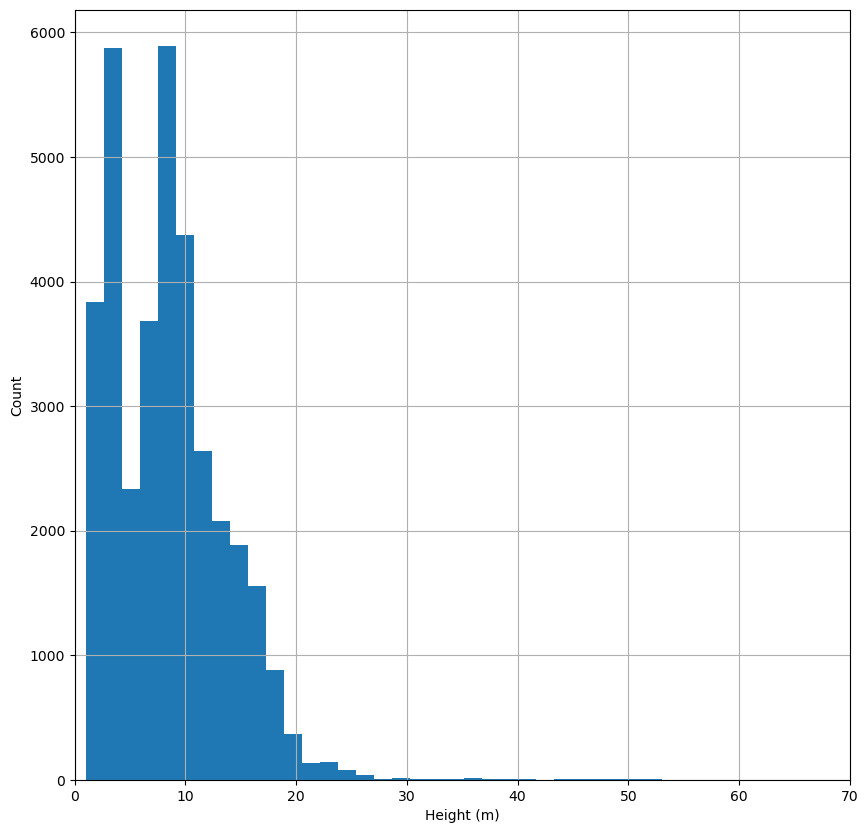

In [80]:
plt.figure(figsize=(10,10))
ax = bldgs['measuredHeight'].hist(bins=40)
ax.set_xlabel('Height (m)')
ax.set_ylabel('Count')
ax.set_xlim(0, 70)
plt.savefig('Graphs/height_hist.png',bbox_inches='tight')
plt.show()


In [81]:
# check which buildings are within 100m of a station
# output is a tuple of two arrays, the first contains the indices of the buildings that are within 100m of a station, the second contains the indices of the stations that have buildings within 100m
contains_a, contains_b = stns['r100'].sindex.query(bldgs['geometry'], predicate="within")

In [82]:
# check which buildings are within 100m of station FRLORE
contains_a[contains_b==20]

array([    5,    13,    28,    29,    34,    35,    36,    37,    38,
          39,    55,    59, 14321, 14338, 14339, 14340, 14341, 14364,
       15976, 15982, 15983, 31283, 34729, 34730, 34731, 34732, 34733,
       34734, 34735, 34736, 34739, 34741, 34742, 34745, 34746, 34748,
       34749])

In [83]:
bldgs['geometry'].loc[contains_a].explore()

In [84]:
bldgs['geometry'].loc[contains_a[contains_b==20]].explore()

In [42]:
bldgs.loc[contains_a[contains_b==20]]

,oid,aktualit,gebnutzbez,funktion,fktkurz,name_x,anzahlgs,lagebeztxt,geometry_x,geometry_y,...,Traufhoehe,roofType,measuredHeight,measuredHeight_uom,Gemeindeschluessel,Hausnummer,Lagebezeichnung,class,name_y,geometry
5,DEBWL0010007TA02BL,2014-05-05,Gebaeude,Wohnhaus,31001_1010,None,NaN,Silberbachstraße 12,"POLYGON ((4190015.838 5324303.786, 4190032.423...",MULTIPOLYGON Z (((413887.99 5314905.18 277.091...,...,290.056,1000,12.965,m,8311000.0,12,Silberbachstraße,Wohnen,None,"POLYGON ((4190015.838 5324303.786, 4190032.423..."
13,DEBWL0010007TA0CBL,2018-12-20,Gebaeude,Wohnhaus,31001_1010,None,NaN,Silberbachstraße 10,"POLYGON ((4190061.641 5324294.534, 4190061.186...","MULTIPOLYGON Z (((413917.23 5314892.41 276.22,...",...,287.210,1000,10.991,m,8311000.0,10,Silberbachstraße,Wohnen,None,"POLYGON ((4190061.641 5324294.534, 4190061.186..."
28,DEBWL0010007TA0UBL,2012-11-14,Gebaeude,Wohnhaus,31001_1010,None,NaN,Silberbachstraße 11,"POLYGON ((4190038.543 5324250.663, 4190037.234...",MULTIPOLYGON Z (((413895.41 5314838.13 279.332...,...,291.303,1000,11.971,m,8311000.0,11,Silberbachstraße,Wohnen,None,"POLYGON ((4190038.543 5324250.663, 4190037.234..."
29,DEBWL0010007TA0VBL,2012-11-14,Gebaeude,Wohnhaus,31001_1010,None,NaN,Silberbachstraße 13,"POLYGON ((4190007.813 5324256.531, 4190014.727...",MULTIPOLYGON Z (((413872.16 5314857.62 278.479...,...,290.989,1000,12.510,m,8311000.0,13,Silberbachstraße,Wohnen,None,"POLYGON ((4190007.813 5324256.531, 4190014.727..."
34,DEBWL0010007TA0eBL,2012-11-14,Gebaeude,Garage,31001_2463,None,NaN,None,"POLYGON ((4190017.265 5324221.826, 4190015.427...","MULTIPOLYGON Z (((413874.06 5314826.81 279.8, ...",...,288.019,1000,8.220,m,8311000.0,None,Holbeinstraße,Sonstige,None,"POLYGON ((4190017.265 5324221.826, 4190015.427..."
35,DEBWL0010007TA0fBL,2012-11-14,Gebaeude,Wohnhaus,31001_1010,None,NaN,Holbeinstraße 11,"POLYGON ((4190023.697 5324226.155, 4190024.109...",MULTIPOLYGON Z (((413882.65 5314829.01 279.967...,...,289.867,1000,9.900,m,8311000.0,11,Holbeinstraße,Wohnen,None,"POLYGON ((4190023.697 5324226.155, 4190024.109..."
36,DEBWL0010007TA0gBL,2012-11-14,Gebaeude,Wohnhaus,31001_1010,None,NaN,Holbeinstraße 13,"POLYGON ((4190033.492 5324196.899, 4190026.953...","MULTIPOLYGON Z (((413886.3 5314808.27 280.858,...",...,291.849,1000,10.991,m,8311000.0,13,Holbeinstraße,Wohnen,None,"POLYGON ((4190033.492 5324196.899, 4190026.953..."
37,DEBWL0010007TA0hBL,2012-11-14,Gebaeude,Garage,31001_2463,None,NaN,None,"POLYGON ((4190035.252 5324217.366, 4190039.647...",MULTIPOLYGON Z (((413898.38 5314823.78 280.276...,...,295.375,1000,15.099,m,8311000.0,None,Holbeinstraße,Sonstige,None,"POLYGON ((4190035.252 5324217.366, 4190039.647..."
38,DEBWL0010007TA0iBL,2012-11-14,Gebaeude,Wohnhaus,31001_1010,None,NaN,Holbeinstraße 15,"POLYGON ((4190033.492 5324196.899, 4190041.743...",MULTIPOLYGON Z (((413901.15 5314806.46 280.733...,...,291.371,1000,10.638,m,8311000.0,15,Holbeinstraße,Wohnen,None,"POLYGON ((4190033.492 5324196.899, 4190041.743..."
39,DEBWL0010007TA0jBL,2012-11-14,Gebaeude,Wohnhaus,31001_1010,None,NaN,Silberbachstraße 9,"POLYGON ((4190056.492 5324249.593, 4190056.37 ...",MULTIPOLYGON Z (((413914.01 5314851.54 279.806...,...,290.352,1000,10.546,m,8311000.0,9,Silberbachstraße,Wohnen,None,"POLYGON ((4190056.492 5324249.593, 4190056.37 ..."


In [85]:
bldgs.loc[contains_a[contains_b==20]].measuredHeight.mean()

9.942945945945945

In [44]:
stns

,ID,Type,Elevation (m a.s.l),UAC,LCZ,Longitude (°E),Latitude (°N),geometry,r10,r20,...,r250,r300,r400,r500,r750,r1000,r1500,r2000,r5000,r10000
0,FRASHA,T1,296,11210,6,7.870209,47.986557,POINT (4191867.298 5324750.579),"POLYGON ((4191877.298 5324750.579, 4191877.25 ...","POLYGON ((4191887.298 5324750.579, 4191887.202...",...,"POLYGON ((4192117.298 5324750.579, 4192116.094...","POLYGON ((4192167.298 5324750.579, 4192165.853...","POLYGON ((4192267.298 5324750.579, 4192265.372...","POLYGON ((4192367.298 5324750.579, 4192364.89 ...","POLYGON ((4192617.298 5324750.579, 4192613.686...","POLYGON ((4192867.298 5324750.579, 4192862.483...","POLYGON ((4193367.298 5324750.579, 4193360.075...","POLYGON ((4193867.298 5324750.579, 4193857.667...","POLYGON ((4196867.298 5324750.579, 4196843.221...","POLYGON ((4201867.298 5324750.579, 4201819.145..."
1,FRBETZ,T2,250,11210,5,7.817673,48.004900,POINT (4188057.653 5327001.249),"POLYGON ((4188067.653 5327001.249, 4188067.605...","POLYGON ((4188077.653 5327001.249, 4188077.557...",...,"POLYGON ((4188307.653 5327001.249, 4188306.449...","POLYGON ((4188357.653 5327001.249, 4188356.209...","POLYGON ((4188457.653 5327001.249, 4188455.727...","POLYGON ((4188557.653 5327001.249, 4188555.246...","POLYGON ((4188807.653 5327001.249, 4188804.042...","POLYGON ((4189057.653 5327001.249, 4189052.838...","POLYGON ((4189557.653 5327001.249, 4189550.43 ...","POLYGON ((4190057.653 5327001.249, 4190048.023...","POLYGON ((4193057.653 5327001.249, 4193033.577...","POLYGON ((4198057.653 5327001.249, 4198009.501..."
2,FRBRUH,T1,238,12100,8,7.854189,48.031009,POINT (4190938.03 5329756.106),"POLYGON ((4190948.03 5329756.106, 4190947.982 ...","POLYGON ((4190958.03 5329756.106, 4190957.933 ...",...,"POLYGON ((4191188.03 5329756.106, 4191186.826 ...","POLYGON ((4191238.03 5329756.106, 4191236.585 ...","POLYGON ((4191338.03 5329756.106, 4191336.104 ...","POLYGON ((4191438.03 5329756.106, 4191435.622 ...","POLYGON ((4191688.03 5329756.106, 4191684.418 ...","POLYGON ((4191938.03 5329756.106, 4191933.214 ...","POLYGON ((4192438.03 5329756.106, 4192430.807 ...","POLYGON ((4192938.03 5329756.106, 4192928.399 ...","POLYGON ((4195938.03 5329756.106, 4195913.953 ...","POLYGON ((4200938.03 5329756.106, 4200889.877 ..."
3,FRDIET,T2,230,13300,C,7.792878,48.013766,POINT (4186261.904 5328087.592),"POLYGON ((4186271.904 5328087.592, 4186271.856...","POLYGON ((4186281.904 5328087.592, 4186281.808...",...,"POLYGON ((4186511.904 5328087.592, 4186510.7 5...","POLYGON ((4186561.904 5328087.592, 4186560.459...","POLYGON ((4186661.904 5328087.592, 4186659.978...","POLYGON ((4186761.904 5328087.592, 4186759.496...","POLYGON ((4187011.904 5328087.592, 4187008.293...","POLYGON ((4187261.904 5328087.592, 4187257.089...","POLYGON ((4187761.904 5328087.592, 4187754.681...","POLYGON ((4188261.904 5328087.592, 4188252.273...","POLYGON ((4191261.904 5328087.592, 4191237.828...","POLYGON ((4196261.904 5328087.592, 4196213.751..."
4,FRDREI,T1,260,12220,6,7.826545,47.995872,POINT (4188665.059 5325961.778),"POLYGON ((4188675.059 5325961.778, 4188675.011...","POLYGON ((4188685.059 5325961.778, 4188684.963...",...,"POLYGON ((4188915.059 5325961.778, 4188913.855...","POLYGON ((4188965.059 5325961.778, 4188963.615...","POLYGON ((4189065.059 5325961.778, 4189063.133...","POLYGON ((4189165.059 5325961.778, 4189162.652...","POLYGON ((4189415.059 5325961.778, 4189411.448...","POLYGON ((4189665.059 5325961.778, 4189660.244...","POLYGON ((4190165.059 5325961.778, 4190157.836...","POLYGON ((4190665.059 5325961.778, 4190655.429...","POLYGON ((4193665.059 5325961.778, 4193640.983...","POLYGON ((4198665.059 5325961.778, 4198616.907..."
5,FREBNE,T11,340,23000,C,7.922671,47.983431,POINT (4195763.842 5324194.382),"POLYGON ((4195773.842 5324194.382, 4195773.794...","POLYGON ((4195783.842 5324194.382, 4195783.746...",...,"POLYGON ((4196013.842 5324194.382, 4196012.639...","POLYGON ((4196063.842 5324194.382, 4196062.398...","POLYGON ((4196163.842 5324194.382, 4196161.916...","PO

In [86]:
# create a DataFrame to store the average building height within each radius of each station
height = pd.DataFrame(index=radii, columns=stns.ID)

for r in radii:
    # check which buildings are within 100m of a station
    # output is a tuple of two arrays, the first contains the indices of the buildings that are within 100m of a station, 
    # the second contains the indices of the stations that have buildings within 100m
    contains_a, contains_b = stns['r'+str(r)].sindex.query(bldgs['geometry'], predicate="within")

    for index, s in stns.iterrows():
        # check which buildings are within radius r of station with index index
        hght = bldgs.loc[contains_a[contains_b==index]].measuredHeight.mean()
        
        # store the average building height within radius r of station ID
        height.loc[r, s.ID] = hght


In [87]:
height

ID,FRASHA,FRBETZ,FRBRUH,FRDIET,FRDREI,FREBNE,FREICH,FRFRIE,FRGART,FRGLBA,...,FRTIEN,FRUNIK,FRUWIE,FRVAUB,FRWAHS,FRWEIN,FRWILD,FRWITT,FRWSEE,FRZAHR
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.39,...,NaN,NaN,NaN,NaN,NaN,13.377,NaN,NaN,NaN,10.0
30,4.999,NaN,2.759,NaN,NaN,NaN,NaN,3.372,8.787,8.695333,...,NaN,NaN,9.0,5.246,NaN,13.377,NaN,NaN,7.06575,9.0565
40,5.7878,17.98,2.759,NaN,NaN,NaN,NaN,3.6095,8.58775,8.795833,...,NaN,NaN,9.584,10.502167,NaN,13.377,NaN,NaN,6.985429,6.582
50,6.405,19.033,2.759,NaN,16.022,NaN,NaN,4.0036,8.564933,7.8035,...,NaN,17.3115,9.7276,11.2063,NaN,18.1535,NaN,NaN,7.23775,6.010615
60,6.513412,19.033,2.759,NaN,16.125333,NaN,NaN,4.0036,8.583962,7.252875,...,NaN,17.182333,9.890667,11.416385,NaN,16.207333,NaN,NaN,6.504286,5.7155
70,7.540208,18.682833,6.4156,2.942,16.22775,NaN,NaN,4.0036,8.592028,7.492947,...,NaN,17.182333,9.554609,11.908654,NaN,16.6174,NaN,NaN,6.762462,5.975952
80,7.928437,19.2055,6.4156,2.942,16.637667,NaN,NaN,4.0036,8.610405,8.002783,...,NaN,17.182333,9.664185,11.859844,NaN,16.249875,NaN,NaN,6.7908,5.968207
90,8.058872,16.597846,7.013,2.942,16.704286,NaN,NaN,4.0036,8.627457,7.80669,...,NaN,17.08325,10.052417,11.664235,NaN,16.788667,NaN,NaN,6.765415,5.970585
100,8.116636,16.560875,8.025375,2.942,16.579333,NaN,NaN,4.0036,8.574971,7.933912,...,NaN,17.1502,10.93938,11.777289,NaN,15.066625,NaN,NaN,6.813407,5.443


<Figure size 1000x1000 with 0 Axes>

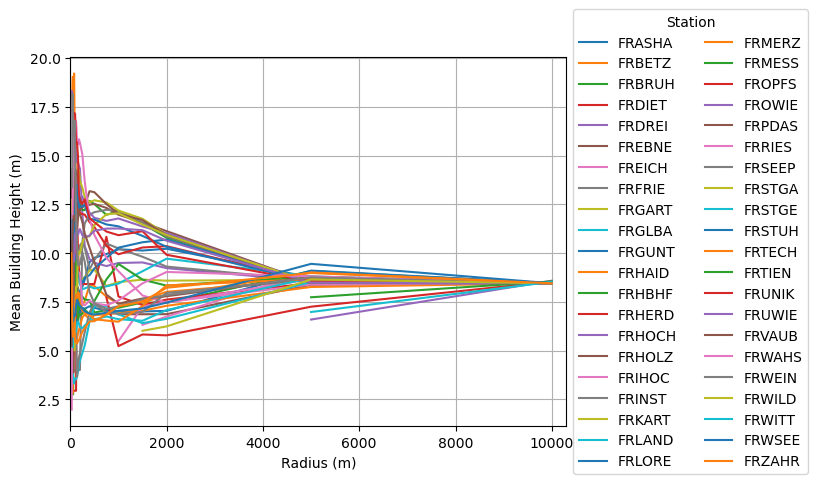

In [94]:
#plot height with axes labels and make legend two columns wide and to the right of the figure
plt.figure(figsize=(10,10))
ax = height.plot()
ax.set_xlabel('Radius (m)')
ax.set_ylabel('Mean Building Height (m)')
ax.legend(title='Station', ncol=2, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlim(0, 10300)
plt.grid()
plt.savefig('Graphs/height_radius.png',bbox_inches='tight')
plt.show()

In [95]:
height.to_csv('height.csv')

In [96]:
height

ID,FRASHA,FRBETZ,FRBRUH,FRDIET,FRDREI,FREBNE,FREICH,FRFRIE,FRGART,FRGLBA,...,FRTIEN,FRUNIK,FRUWIE,FRVAUB,FRWAHS,FRWEIN,FRWILD,FRWITT,FRWSEE,FRZAHR
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.39,...,NaN,NaN,NaN,NaN,NaN,13.377,NaN,NaN,NaN,10.0
30,4.999,NaN,2.759,NaN,NaN,NaN,NaN,3.372,8.787,8.695333,...,NaN,NaN,9.0,5.246,NaN,13.377,NaN,NaN,7.06575,9.0565
40,5.7878,17.98,2.759,NaN,NaN,NaN,NaN,3.6095,8.58775,8.795833,...,NaN,NaN,9.584,10.502167,NaN,13.377,NaN,NaN,6.985429,6.582
50,6.405,19.033,2.759,NaN,16.022,NaN,NaN,4.0036,8.564933,7.8035,...,NaN,17.3115,9.7276,11.2063,NaN,18.1535,NaN,NaN,7.23775,6.010615
60,6.513412,19.033,2.759,NaN,16.125333,NaN,NaN,4.0036,8.583962,7.252875,...,NaN,17.182333,9.890667,11.416385,NaN,16.207333,NaN,NaN,6.504286,5.7155
70,7.540208,18.682833,6.4156,2.942,16.22775,NaN,NaN,4.0036,8.592028,7.492947,...,NaN,17.182333,9.554609,11.908654,NaN,16.6174,NaN,NaN,6.762462,5.975952
80,7.928437,19.2055,6.4156,2.942,16.637667,NaN,NaN,4.0036,8.610405,8.002783,...,NaN,17.182333,9.664185,11.859844,NaN,16.249875,NaN,NaN,6.7908,5.968207
90,8.058872,16.597846,7.013,2.942,16.704286,NaN,NaN,4.0036,8.627457,7.80669,...,NaN,17.08325,10.052417,11.664235,NaN,16.788667,NaN,NaN,6.765415,5.970585
100,8.116636,16.560875,8.025375,2.942,16.579333,NaN,NaN,4.0036,8.574971,7.933912,...,NaN,17.1502,10.93938,11.777289,NaN,15.066625,NaN,NaN,6.813407,5.443
